In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data/', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 84)
        #self.fc4 = nn.Linear(84, 84)
        self.fc5 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        x = self.fc5(x)
        
        return x
    
net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
import os

# Define paths
model_directory_path = 'model/'
model_path = os.path.join(model_directory_path, 'cifar-mnist-cnn-model.pt')

# Ensure directory exists
if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

def load_model(net):
    """Loads the trained model if it exists."""
    if os.path.isfile(model_path):
        net.load_state_dict(torch.load(model_path))
        print('Loaded model parameters from disk.')
        return True  # Indicate successful loading
    else:
        print('No saved model found.')
        return False

def train_model(net, trainloader, criterion, optimizer, epochs=2):
    """Trains the model from scratch."""
    print("Starting training...")
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 2000 == 1999:  # Print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')

In [13]:
train_model(net, trainloader, criterion, optimizer, 3)

Starting training...
[1,  2000] loss: 1.156
[1,  4000] loss: 1.139
[1,  6000] loss: 1.131
[1,  8000] loss: 1.147
[1, 10000] loss: 1.116
[1, 12000] loss: 1.112
[2,  2000] loss: 1.040
[2,  4000] loss: 1.061
[2,  6000] loss: 1.053
[2,  8000] loss: 1.037
[2, 10000] loss: 1.067
[2, 12000] loss: 1.067
[3,  2000] loss: 0.981
[3,  4000] loss: 0.997
[3,  6000] loss: 0.994
[3,  8000] loss: 0.996
[3, 10000] loss: 0.985
[3, 12000] loss: 1.006
Finished Training.


In [6]:
import os

epochs = 2

model_directory_path = 'model/'
model_path = model_directory_path + 'cifar-10-cnn-model.pt'

if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

if os.path.isfile(model_path):
    # load trained model parameters from disk
    net.load_state_dict(torch.load(model_path))
    print('Loaded model parameters from disk.')
else:
    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')

/var/folders/w5/cr9dv6h106v9sddn3p0_pt200000gn/T/ipykernel_29414/345907458.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path))


RuntimeError: Error(s) in loading state_dict for Net:
	Missing key(s) in state_dict: "fc4.weight", "fc4.bias", "fc5.weight", "fc5.bias". 
	size mismatch for fc3.weight: copying a param with shape torch.Size([10, 84]) from checkpoint, the shape in current model is torch.Size([84, 84]).
	size mismatch for fc3.bias: copying a param with shape torch.Size([10]) from checkpoint, the shape in current model is torch.Size([84]).

In [14]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 62.91%


In [31]:
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 0.0
car        - 0.0
bird       - 0.0
cat        - 0.0
deer       - 0.0
dog        - 100.0
frog       - 0.0
horse      - 0.0
ship       - 0.0
truck      - 0.0


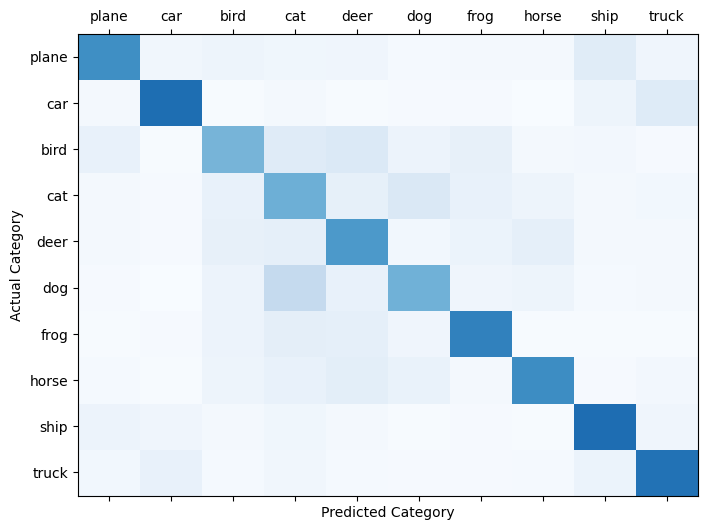

In [21]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

In [15]:
model = net
torch.save(model, 'model2e_full.pth')